# 웹에서 주문 수를 분석하는 테크닉

#### 목적 : 판매량 개선의 방향을 찾자.

#### 데이터
- customer_master.csv : 고객 정보(회원 등록 시)
- item_master.csv : 상품 데이터. 상품명, 가격. 
- transaction.csv : 구매 내역 데이터
- transaction_detail.csv : 구매 내역 상세 데이터. 

#### 데이터 읽어오기

In [1]:
import pandas as pd

In [14]:
customer_master = pd.read_csv("./pyda100-master/1장/customer_master.csv")
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [16]:
item_master = pd.read_csv("./pyda100-master/1장/item_master.csv")
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [18]:
transaction1 = pd.read_csv("./pyda100-master/1장/transaction_1.csv")
transaction1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [19]:
transaction2 = pd.read_csv("./pyda100-master/1장/transaction_2.csv")
transaction2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [20]:
transaction_detail1 = pd.read_csv("./pyda100-master/1장/transaction_detail_1.csv")
transaction_detail1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [21]:
transaction_detail2 = pd.read_csv("./pyda100-master/1장/transaction_detail_2.csv")
transaction_detail2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


데이터의 개요를 살펴보기 위해 상세한 데이터 쪽에 맞춰 가공하는 것이 좋다.
- transaction_detail 데이터를 기준으로 생각해보자.
    + transaction 데이터와 조인하면 각 상품의 매출을 알 수 있음. 시간 속성도 있어서 매출의 추세도 알 수 있을 것 같고.
    + 추가로 customer_master 데이터와 조인하면 성별, 나이, 지역에 따른 매출 성향도 알 수 있음. 

In [13]:
transaction_detail2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


#### transaction, transaction_detail 데이터 union.

In [27]:
transaction = pd.concat([transaction1, transaction2], ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [28]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6786 entries, 0 to 6785
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  6786 non-null   object
 1   price           6786 non-null   int64 
 2   payment_date    6786 non-null   object
 3   customer_id     6786 non-null   object
dtypes: int64(1), object(3)
memory usage: 212.2+ KB


In [29]:
transaction1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  5000 non-null   object
 1   price           5000 non-null   int64 
 2   payment_date    5000 non-null   object
 3   customer_id     5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


In [30]:
transaction2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1786 non-null   object
 1   price           1786 non-null   int64 
 2   payment_date    1786 non-null   object
 3   customer_id     1786 non-null   object
dtypes: int64(1), object(3)
memory usage: 55.9+ KB


In [31]:
transaction_detail = pd.concat([transaction_detail1, transaction_detail2], ignore_index=True)
transaction_detail

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
7139,7139,T0000006894,S004,1
7140,7140,T0000006895,S002,1
7141,7141,T0000006896,S001,2
7142,7142,T0000006897,S002,1


In [33]:
len(transaction_detail1), len(transaction_detail2), len(transaction_detail)

(5000, 2144, 7144)

#### 매출 데이터끼리 join.
기준이 되는 데이터, 키를 생각. 

In [35]:
join_data = pd.merge(transaction_detail, transaction[['transaction_id', 'payment_date', 'customer_id']], on='transaction_id', how='left')
join_data

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865
...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738


In [36]:
len(join_data), len(transaction), len(transaction_detail)

(7144, 6786, 7144)

In [38]:
join_data = pd.merge(join_data, customer_master, on='customer_id', how='left')
join_data = pd.merge(join_data, item_master, on='item_id', how='left')
join_data

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시,PC-D,180000
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시,PC-B,85000
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시,PC-A,50000
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시,PC-B,85000


#### feature 생성

In [40]:
join_data['price'] = join_data['quantity'] * join_data['item_price']
join_data[['quantity', 'item_price', 'price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


In [41]:
sum(join_data['price']), sum(transaction['price'])

(971135000, 971135000)

#### 통계량 계산

In [44]:
join_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 7143
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   detail_id          7144 non-null   int64 
 1   transaction_id     7144 non-null   object
 2   item_id            7144 non-null   object
 3   quantity           7144 non-null   int64 
 4   payment_date       7144 non-null   object
 5   customer_id        7144 non-null   object
 6   customer_name      7144 non-null   object
 7   registration_date  7144 non-null   object
 8   email              7144 non-null   object
 9   gender             7144 non-null   object
 10  age                7144 non-null   int64 
 11  birth              7144 non-null   object
 12  pref               7144 non-null   object
 13  item_name          7144 non-null   object
 14  item_price         7144 non-null   int64 
 15  price              7144 non-null   int64 
dtypes: int64(5), object(11)
memory usage: 948.

In [42]:
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [43]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [48]:
join_data['payment_date'].min(), join_data['payment_date'].max()

('2019-02-01 01:36:57', '2019-07-31 23:41:38')

#### 월별 데이터 집계

In [47]:
join_data.dtypes

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
price                 int64
dtype: object

In [51]:
join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])
join_data['payment_month'] = join_data['payment_date'].dt.strftime("%Y-%m")
join_data[['payment_date', 'payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,2019-02
1,2019-02-01 01:37:23,2019-02
2,2019-02-01 02:34:19,2019-02
3,2019-02-01 02:47:23,2019-02
4,2019-02-01 04:33:46,2019-02


In [53]:
join_data.groupby('payment_month')['price'].sum()

payment_month
2019-02    160185000
2019-03    160370000
2019-04    160510000
2019-05    155420000
2019-06    164030000
2019-07    170620000
Name: price, dtype: int64

In [57]:
# 월별, 상품별 집계
join_data.groupby(['payment_month' , 'item_name'])[['price', 'quantity']].sum()

price  quantity
payment_month item_name                    
2019-02       PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
2019-03       PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
2019-04       PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
2019-05       PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
2019-06       PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
2019-07       PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [61]:
pd.pivot_table(join_data, index='payment_month', columns='item_name', values=['price', 'quantity'], aggfunc="sum")

price                                         quantity       \
item_name          PC-A      PC-B      PC-C      PC-D      PC-E     PC-A PC-B   
payment_month                                                                   
2019-02        24150000  25245000  19800000  31140000  59850000      483  297   
2019-03        26000000  25500000  19080000  25740000  64050000      520  300   
2019-04        25900000  23460000  21960000  24300000  64890000      518  276   
2019-05        24850000  25330000  20520000  25920000  58800000      497  298   
2019-06        26000000  23970000  21840000  28800000  63420000      520  282   
2019-07        25250000  28220000  19440000  26100000  71610000      505  332   

                              
item_name     PC-C PC-D PC-E  
payment_month                 
2019-02        165  173  285  
2019-03        159  143  305  
2019-04        183  135  309  
2019-05        171  144  280  
2019-06        182  160  302  
2019-07        162  145  341

In [62]:
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='price', aggfunc="sum")
graph_data

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
2019-02,24150000,25245000,19800000,31140000,59850000
2019-03,26000000,25500000,19080000,25740000,64050000
2019-04,25900000,23460000,21960000,24300000,64890000
2019-05,24850000,25330000,20520000,25920000,58800000
2019-06,26000000,23970000,21840000,28800000,63420000
2019-07,25250000,28220000,19440000,26100000,71610000


In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

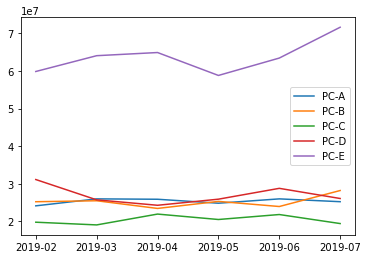

In [79]:
plt.plot(list(graph_data.index), graph_data['PC-A'], label='PC-A')
plt.plot(list(graph_data.index), graph_data['PC-B'], label='PC-B')
plt.plot(list(graph_data.index), graph_data['PC-C'], label='PC-C')
plt.plot(list(graph_data.index), graph_data['PC-D'], label='PC-D')
plt.plot(list(graph_data.index), graph_data['PC-E'], label='PC-E')
plt.legend()
plt.show()